# Linear regression with one variable
 
## Plotting the Data

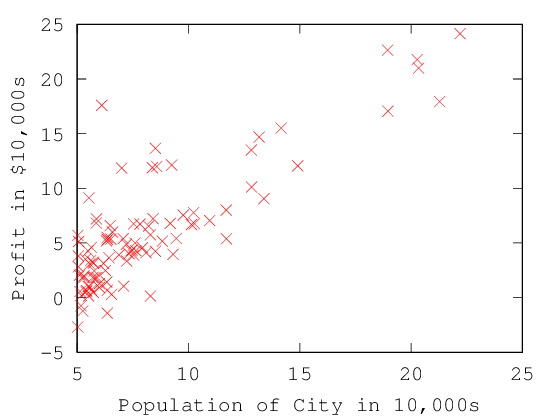

In [2]:
data = load('ex1data1.txt');
X = data(:, 1);
y = data(:, 2);
m = length(y);

plot(X, y, 'rx', 'MarkerSize', 5);
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');

## Gradient Descent

$$
\begin{eqnarray}
J(\theta) & = & {1 \over 2m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 \\
h_\theta(x) & = & \theta^Tx = \theta_0 + \theta_1x_1
\end{eqnarray}
$$

In [3]:
X = [ones(m, 1), data(:, 1)];   % add a column of ones to X
theta = zeros(2, 1);
iterations = 1500;
alpha = 0.01;

In [4]:
function J = computeCost(X, y, theta)
    m = length(y);
    pred = 0.0;
    for i=1:m,
        pred = pred + (theta' * X(i, :)' - y(i))^2;
    end;
    J = pred / (2 * m);
endfunction;

computeCost(X, y, theta)

ans =  32.073


すべての $j$ に対して $\theta_j$ を同時に更新する

$$
\theta_j := \theta_j - \alpha{1 \over m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

ベクトル化すると

$$
\begin{eqnarray}
\theta & := & \theta - \alpha\delta \\
\delta & = & {1 \over m}\sum_{i = 0}^m(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}
\end{eqnarray}
$$

In [26]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    m = length(y);
    J_history = zeros(num_iters, 1);
    
    for iter = 1:num_iters
        delta = 0;
        for i = 1:m,
            delta = delta + (theta' * X(i, :)' - y(i)) * X(i, :);
        end;
        delta = delta / m;
        
        theta = theta - (delta .* alpha)';

        J_history(iter) = computeCost(X, y, theta);
    end
endfunction

[optimized_theta, J_history] = gradientDescent(X, y, theta, alpha, iterations);

イテレーション毎の $J(\theta)$ の推移

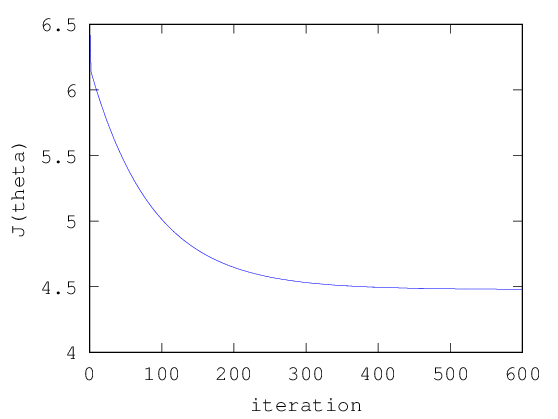

In [27]:
plot(1:iterations, J_history)
axis([0 iterations])
xlabel('iteration'), ylabel('J(theta)')

$$
\begin{eqnarray}
\theta & = & \begin{pmatrix}
    \theta_0 \\
    \theta_1
\end{pmatrix} , \quad
mx & = & \begin{pmatrix}
1 & ... & 1 \\
x_0 & ... & x_n
\end{pmatrix} \\
my & = & \theta^Tmx
\end{eqnarray}
$$

error: operator *: nonconformant arguments (op1 is 1x3, op2 is 2x201)


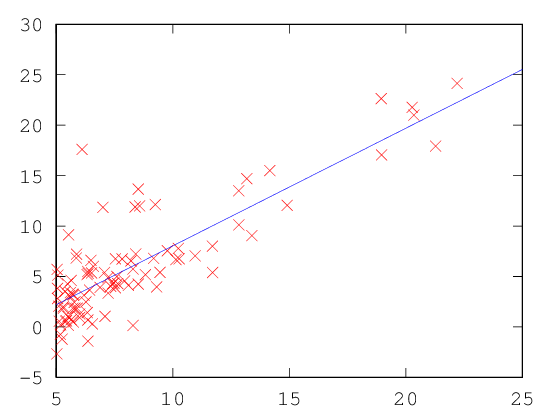

In [28]:
eX = data(:, 1);
ey = data(:, 2);

mx = 5:0.1:25;
mx = [ones(1, size(mx)(2)) ; mx];
my = optimized_theta' * mx;

plot(eX, ey, 'rx', 'MarkerSize', 5);
hold on;
plot(mx(2, :), my)

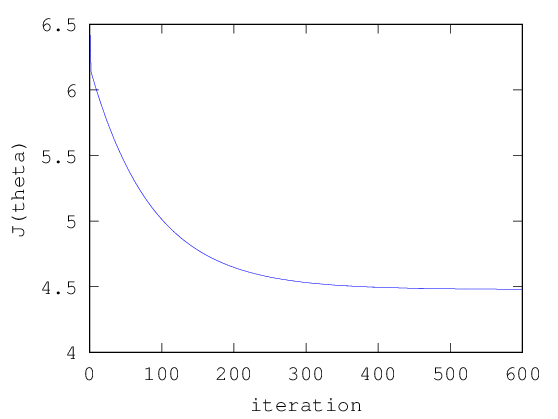

In [34]:
m = length(y);
X = [ones(m, 1), data(:, 1), sqrt(data(:, 1))];
%X = [ones(m, 1), data(:, 1), data(:, 1).^2];

theta = zeros(3, 1);
iterations = 600;
alpha = 0.01;

[optimized_theta, J_history] = gradientDescent(X, y, theta, alpha, iterations);
plot(1:iterations, J_history)
axis([0 iterations])
xlabel('iteration'), ylabel('J(theta)')

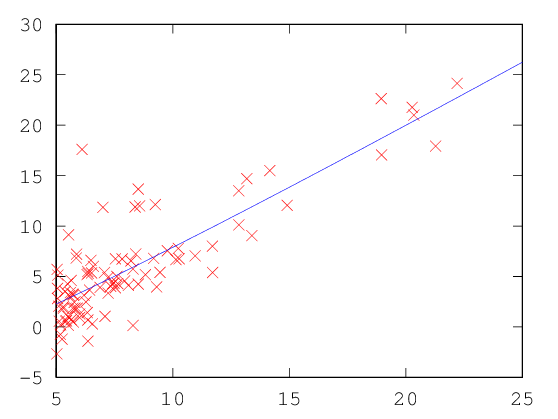

In [32]:
mx2 = 5:0.1:25;
mx2 = [ones(1, size(mx2)(2)) ; mx2 ; sqrt(mx2)];
my2 = optimized_theta' * mx2;

plot(eX, ey, 'rx', 'MarkerSize', 5);
hold on;
plot(mx2(2, :), my2)